NameError: name 'png_out_dir' is not defined

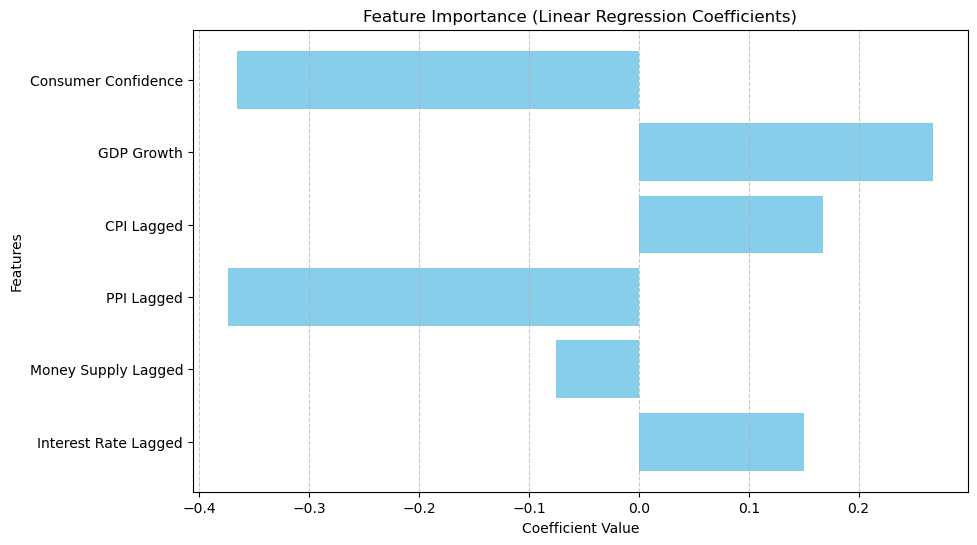

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Reload the updated dataset
data = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/lagged_dataset/lagged_dataset_merged.csv')

# Add GDP Growth and Consumer Confidence to the feature set
X = data[['Interest_Rate_Lagged', 'Money_Supply_Lagged', 'PPI_Lagged', 
          'CPI_Lagged', 'GDP_Growth', 'Consumer_Confidence']]
y = data['Unemployment_Rate']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model coefficients, intercept, MSE, and R²
model_results_updated = {
    "MSE": mse,
    "R²": r2,
    "Coefficients": model.coef_,
    "Intercept": model.intercept_
}
model_results_updated

import matplotlib.pyplot as plt
import numpy as np
import os

# Visualize feature importance (coefficients)
features = ['Interest Rate Lagged', 'Money Supply Lagged', 'PPI Lagged', 
            'CPI Lagged', 'GDP Growth', 'Consumer Confidence']
coefficients = model.coef_

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
png_out_dir='../output/linear_regression'
png_file_path = os.path.join(png_out_dir, 'feature_importance.png')
plt.savefig(png_file_path)
print(f"Plot saved to {png_file_path}")
plt.show()

# Calculate and visualize residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='orange', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals of Linear Regression Model")
plt.xlabel("Actual Unemployment Rate")
plt.ylabel("Residuals")
plt.grid(True)
png_out_dir='../output/linear_regression'
png_file_path = os.path.join(png_out_dir, 'residuals.png')
plt.savefig(png_file_path)
print(f"Plot saved to {png_file_path}")
plt.show()
